<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/02wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-wdw3rc9ka0a_JSpsth-XBO&si=Vct3AMxWuodtSlzX >}}

# 2. Imports

In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

# 3. 회귀모형

## A. 소설 

`-` 카페주인인 박혜원씨는 온도와 아이스아메리카노 판매량이 관계가 있다는 것을 알았다. 구체적으로는 

> "온도가 높아질 수록 (=날씨가 더울수록) 아이스아메리카노의 판매량이 증가"

한다는 사실을 알게 되었다. 박혜원씨는 

> 일기예보를 보고 오늘의 평균 기온을 입력하면, 오늘의 아이스아메리카노 판매량을 미리 예측할 수 있지 않을까? 그 예측량만큼 아이스아메리카노를 준비하면 장사에 도움이 되지 않을까???

라는 생각을 하게 되었고 이를 위하여 아래와 같이 100개의 데이터를 모았다. 

In [2]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [3]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

여기에서 `temp`는 평균기온이고, `sales`는 아이스아메리카노 판매량이다.^[판매량이 소수점이고 심지어 음수인것은 그냥 그려러니 하자..] 평균기온과 판매량의 그래프를 그려보면 아래와 같다. 

In [ ]:
plt.plot(temp,sales,'o')

## B. 모델링

`-` 산점도를 살펴본 박혜원씨는 평균기온이 올라갈수록 아이스아메리카노 판매량이 **"선형적"**으로 증가한다는 사실을 캐치했다. 물론 약간의 오차는 있어보였다. 오차까지 고려하여 평균기온과 아이스판매량의 관계를 추정하면 아래와 같이 생각할 수 있다. 

> 아이스아메리카노 판매량 $\approx$ $w_0$ $+$ $w_1$ $\times$ 평균기온

위의 수식에서 만약에 $w_0$와 $w_1$의 값을 적절히 추정한다면, 평균기온량을 입력으로 하였을때 아이스아메리카노 판매량을 예측할 수 있을 것이다.

`-` 아이스크림 판매량을 $y_i$로, 평균기온을 $x_i$로 변수화한뒤 박혜원의 수식을 좀 더 수학적으로 표현하면 

$$y_i \approx w_0 + w_1 x_i,\quad i=1,2,\dots,100$$ 

와 같이 쓸 수 있다. 오차항을 포함하여 좀 더 엄밀하게 쓰면 

$$y_i = w_0 + w_1 x_i + \epsilon_i,\quad i=1,2,\dots,100$$ 

와 같이 나타낼 수 있어보인다. 여기에서 $\epsilon_i \sim N(0,\sigma^2)$ 로 가정해도 무방할 듯 하다. 그런데 이를 다시 아래와 같이 표현하는 것이 가능하다. 

$${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$$

단 여기에서 

$${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf x}=\begin{bmatrix} x_1 \\ x_2 \\ \dots \\ x_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} {\bf 1} & {\bf x} \end{bmatrix}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$$

이다. 

## C. 데이터를 `torch.tensor`로 변환 

`-` 현재까지의 상황을 파이토치로 코딩하면 아래와 같다. 

In [6]:
x = torch.tensor(temp).reshape(-1,1)    # 100 * 1
ones = torch.ones(100).reshape(-1,1)    # 100 * 1
X = torch.concat([ones,x],axis=1)       # 100 * (1+1)
y = torch.tensor(sales).reshape(-1,1)   # 100 * 1
#W = ?? 이건 모름.. 추정해야함. 
#ϵ = ?? 이것도 모름!!

## D. 아무렇게나 추정 

`-` ${\bf W}$ 에 대한 추정값을 $\hat{\bf W}$라고 할때 

$$\hat{\bf W}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix} =\begin{bmatrix} -5 \\ 10 \end{bmatrix}$$ 

으로 추정한 상황이라면 커피판매량의 예측값은 

$$\hat{\bf y} = {\bf X}\hat{\bf W}$$

이라고 표현할 수 있다. 이 의미는 아래의 그림에서 주황색 점선으로 커피판매량을 예측한다는 의미이다. 

In [ ]:
What = torch.tensor([[-5.0],
                     [10.0]])
What    # 2x1

In [ ]:
print(What.shape)

In [14]:
yhat = X@What   # 100x2 @ 2x1 == 100x1

In [ ]:
yhat.shape

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,yhat,'--')

## E. 추정의 방법

`-` 방법1: 이론적으로 추론 \<- 회귀분석시간에 배운것

In [ ]:
# Optimal What은 수식적으로 아래와 같이 구할 수 있다.
torch.linalg.inv((X.T @ X)) @ X.T @ y # 공식~ , 최적 w0,w1 값을 행렬 연산으로 구함

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,2.4459 + 4.0043*x,'--')

`-` 방법2: **컴퓨터의 반복계산을 이용하여 추론 (손실함수도입 + 경사하강법)**

-   1단계: 아무 점선이나 그어본다..
-   2단계: 1단계에서 그은 점선보다 더 좋은 점선으로 바꾼다.
-   3단계: 1-2단계를 반복한다.

# 4. 파이토치의 반복추정 

## A. 문제셋팅 다시 복습

In [19]:
x = torch.tensor(temp).reshape(-1,1)
ones = torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=1)       # 100x1 + 100x1 , axis=1 --> 100x2
y = torch.tensor(sales).reshape(-1,1)
print(X.shape)

torch.Size([100, 2])


## B. 1단계 -- 최초의 점선 

In [20]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)     # requires_grad=True 를 하는 이유는 추후  loss.backward() 를 하기 위함
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [21]:
What_ = torch.tensor([[-5.0],[10.0]],requires_grad=False)     # requires_grad=True 를 하는 이유는 추후  loss.backward() 를 하기 위함
What_

tensor([[-5.],
        [10.]])

In [22]:
yhat = X@What 
yhat_ = X@What_

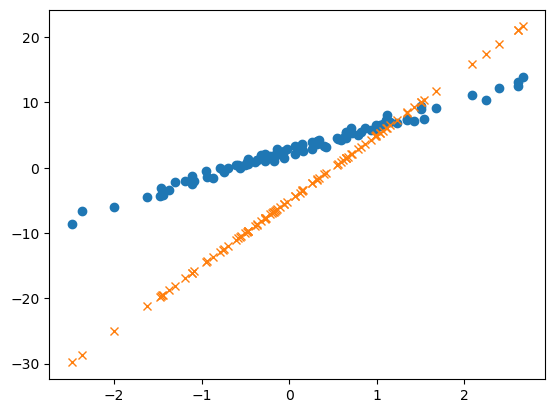

In [23]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'x')                       # 그림을 그리기 위해서 yhat의 미분꼬리표를 제거
#plt.plot(x,torch.sqrt((y-yhat.data)**2),'--')   # Mean Square Error of each element

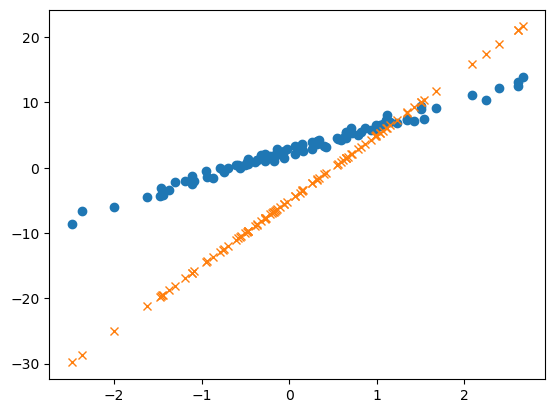

In [24]:
plt.plot(x,y,'o')
plt.plot(x,yhat_.data,'x')                       # 그림을 그리기 위해서 yhat의 미분꼬리표를 제거
#plt.plot(x,torch.sqrt((y-yhat.data)**2),'--')   # Mean Square Error of each element

## C. 2단계 -- update 

`-` ’적당한 정도’를 판단하기 위한 장치: loss function 도입!

$$loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

`-` loss 함수의 특징 

- $y_i \approx \hat{y}_i$ 일수록 loss값이 작다.
- $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0,\hat{w}_1)$을 잘 찍으면
loss값이 작다.
- (중요) 주황색 점선이 ‘적당할 수록’ loss값이 작다.

In [25]:
loss = torch.sum((y-yhat)**2)   # error 제곱의 합
loss

tensor(8587.6240, grad_fn=<SumBackward0>)

In [26]:
loss_ = torch.sum((y-yhat_)**2)   # error 제곱의 합
loss_

tensor(8587.6240)

`-` 우리의 목표: 이 loss(=8587.6240)을 더 줄이자. 

- 궁극적으로는 아예 모든 조합 $(\hat{w}_0,\hat{w}_1)$에 대하여 가장 작은 loss를 찾으면 좋겠다. 

`-` 발상의 전환: 가만히 보니까 loss는 $\hat{\bf W} =\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 에 따라서 값이 바뀌는 함수잖아??? 즉 아래와 같이 생각할 수 있음. 

$$ loss(\hat{w}_0,\hat{w}_1) := loss(\hat{\bf W})=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

따라서 구하고 싶은것은 아래와 같음 

$$\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$$

`-` $loss({\bf W})$를 최소로 만드는 ${\bf W}$를 컴퓨터로 구하는 방법, 즉 $\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$를 구하는 방법을 요약하면 아래와 같다. 

`1`. 임의의 점 $\hat{\bf W}$를 찍는다. 

`2`. 그 점에서 순간기울기를 구한다. 즉 $\frac{\partial}{\partial {\bf W}}loss({\bf W})$ 를 계산한다. 

`3`. $\hat{\bf W}$에서의 순간기울기^[$\frac{\partial}{\partial {\bf W}}loss({\bf W})$]의 부호를 살펴보고 부호와 반대방향으로 움직인다. 이때 기울기의 절대값 크기^[$\left|\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|$]와 비례하여 보폭(=움직이는 정도)을 각각 조절한다. 즉 아래의 수식에 따라 업데이트 한다. 

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

`-` 여기에서 미분을 어떻게...?? 즉 아래를 어떻게 계산해..?

$$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix} $$

> `loss.backward()`를 실행하면 `What.grad`에 미분값이 업데이트 되어요!

(실행전)

In [27]:
print(What.grad)
print(What_.grad)

None
None


(실행후)

In [28]:
loss.backward()

In [29]:
loss_.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [30]:
print(What.grad)

tensor([[-1342.2465],
        [ 1188.9203]])


`-` 계산결과의 검토 (1)

- $loss({\bf W})=({\bf y}-\hat{\bf y})^\top ({\bf y}-\hat{\bf y})=({\bf y}-{\bf XW})^\top ({\bf y}-{\bf XW})$

- $\frac{\partial}{\partial {\bf W}}loss({\bf W})=-2{\bf X}^\top {\bf y}+2{\bf X}^\top {\bf X W}$

In [31]:
- 2 * X.T @ y + 2 * X.T @ X @ What

tensor([[-1342.2465],
        [ 1188.9198]], grad_fn=<AddBackward0>)

In [32]:
- 2 * X.T @ y + 2 * X.T @ X @ What_

tensor([[-1342.2465],
        [ 1188.9198]])

`-` 계산결과의 검토 (2)

$$\frac{\partial}{\partial {\bf W} } loss({\bf W})=\begin{bmatrix}\frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1} \end{bmatrix}loss({\bf W}) =\begin{bmatrix}\frac{\partial}{\partial w_0}loss(w_0,w_1) \\ \frac{\partial}{\partial w_1}loss(w_0,w_1) \end{bmatrix}$$

를 계산하고 싶은데 벡터미분을 할줄 모른다고 하자. 편미분의 정의를 살펴보면, 

$$\frac{\partial}{\partial w_0}loss(w_0,w_1) \approx \frac{loss(w_0+h,w_1)-loss(w_0,w_1)}{h}$$

$$\frac{\partial}{\partial w_1}loss(w_0,w_1) \approx \frac{loss(w_0,w_1+h)-loss(w_0,w_1)}{h}$$

라고 볼 수 있다. 이를 이용하여 근사계산하면 

In [33]:
def l(w0,w1):
    return torch.sum((y-w0-w1*x)**2)

In [34]:
l(-5,10), loss # 로스값일치

(tensor(8587.6240), tensor(8587.6240, grad_fn=<SumBackward0>))

In [35]:
h=0.001 
(l(-5+h,10) - l(-5,10))/h

tensor(-1342.7733)

In [36]:
h=0.001 
(l(-5,10+h) - l(-5,10))/h

tensor(1189.4531)

이 값은 `What.grad`에 저장된 값과 거의 비슷하다. 

In [ ]:
What.grad

`-` 이제 아래의 공식에 넣고 업데이트해보자

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

In [37]:
alpha = 0.001 
print(f"{What.data} -- 수정전")
print(f"{-alpha*What.grad} -- 수정하는폭")
print(f"{What.data-alpha*What.grad} -- 수정후")
print(f"{torch.linalg.inv((X.T @ X)) @ X.T @ y} -- 회귀분석으로 구한값")
print(f"{torch.tensor([[2.5],[4]])} -- 참값(이건 비밀~~)")

tensor([[-5.],
        [10.]]) -- 수정전
tensor([[ 1.3422],
        [-1.1889]]) -- 수정하는폭
tensor([[-3.6578],
        [ 8.8111]]) -- 수정후
tensor([[2.4459],
        [4.0043]]) -- 회귀분석으로 구한값
tensor([[2.5000],
        [4.0000]]) -- 참값(이건 비밀~~)


- alpha를 잘 잡아야함~

`-` 1회 수정결과를 시각화 

In [40]:
What.data

tensor([[-5.],
        [10.]])

In [41]:
Wbefore = What.data
Wafter = What.data - alpha * What.grad 
Wbefore, Wafter , alpha * What.grad 

(tensor([[-5.],
         [10.]]),
 tensor([[-3.6578],
         [ 8.8111]]),
 tensor([[-1.3422],
         [ 1.1889]]))

In [39]:
print( Wafter.grad )
print( What.grad )
print(Wbefore.grad)

None
tensor([[-1342.2465],
        [ 1188.9203]])
None


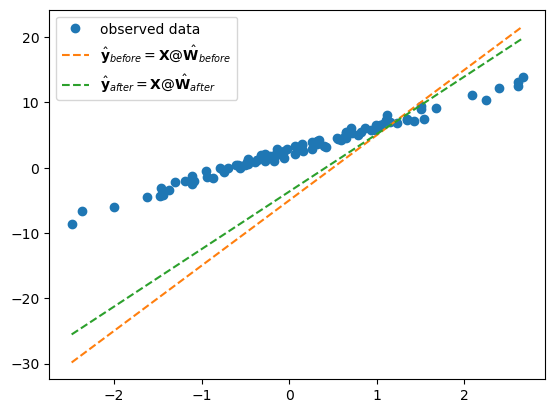

In [42]:
plt.plot(x,y,'o',label=r'observed data')
plt.plot(x,X@Wbefore,'--', label=r"$\hat{\bf y}_{before}={\bf X}@\hat{\bf W}_{before}$")
plt.plot(x,X@Wafter,'--', label=r"$\hat{\bf y}_{after}={\bf X}@\hat{\bf W}_{after}$")
plt.legend()

## D. 3단계 -- iteration (=learn = estimate $\bf{\hat W}$)

In [44]:
x = torch.tensor(temp).reshape(-1,1)
ones = torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=1)
y = torch.tensor(sales).reshape(-1,1)

In [45]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [46]:
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    What.grad = None        # 다음 Gradiend descent step으로 가기 위해서는 None으로 초기화 해줘야한다. RNN 모델의 경우 초기화 하지 않는다고도 하다.

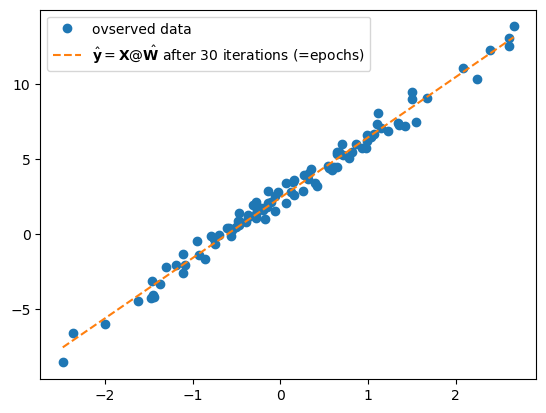

In [47]:
plt.plot(x,y,'o', label = "ovserved data")
plt.plot(x,X@What.data,'--', label = r"$\hat{\bf y}={\bf X}@\hat{\bf W}$ after 30 iterations (=epochs)")
plt.legend()

# 5. 파라메터의 학습과정 음미

## A. 단순무식한 print 

In [48]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
print(f"시작값 = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-0.001 * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

시작값 = tensor([-5., 10.])
loss = 8587.62 	 업데이트폭 = tensor([ 1.3422, -1.1889]) 	 업데이트결과: tensor([-3.6578,  8.8111])
loss = 5675.18 	 업데이트폭 = tensor([ 1.1029, -0.9499]) 	 업데이트결과: tensor([-2.5548,  7.8612])
loss = 3755.63 	 업데이트폭 = tensor([ 0.9056, -0.7596]) 	 업데이트결과: tensor([-1.6492,  7.1016])
loss = 2489.58 	 업데이트폭 = tensor([ 0.7431, -0.6081]) 	 업데이트결과: tensor([-0.9061,  6.4935])
loss = 1654.04 	 업데이트폭 = tensor([ 0.6094, -0.4872]) 	 업데이트결과: tensor([-0.2967,  6.0063])
loss = 1102.33 	 업데이트폭 = tensor([ 0.4995, -0.3907]) 	 업데이트결과: tensor([0.2028, 5.6156])
loss = 737.85 	 업데이트폭 = tensor([ 0.4091, -0.3136]) 	 업데이트결과: tensor([0.6119, 5.3020])
loss = 496.97 	 업데이트폭 = tensor([ 0.3350, -0.2519]) 	 업데이트결과: tensor([0.9469, 5.0501])
loss = 337.72 	 업데이트폭 = tensor([ 0.2742, -0.2025]) 	 업데이트결과: tensor([1.2211, 4.8477])
loss = 232.40 	 업데이트폭 = tensor([ 0.2243, -0.1629]) 	 업데이트결과: tensor([1.4453, 4.6848])
loss = 162.73 	 업데이트폭 = tensor([ 0.1834, -0.1311]) 	 업데이트결과: tensor([1.6288, 4.5537])
loss = 116.64

In [ ]:
What

## B. 반복시각화 -- yhat의 관점에서!

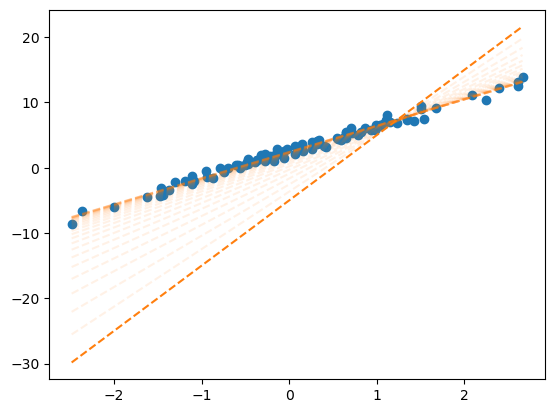

In [49]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
fig = plt.plot(x,y,'o',label = "observed")
plt.plot(x,X@What.data,'--',color="C1")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    plt.plot(x,X@What.data,'--',color="C1",alpha=0.1)
    What.grad = None

## C. 반복시각화 -- loss의 관점에서!! 

In [50]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    return fig

In [ ]:
l(-5,10)

In [ ]:
fig = plot_loss()

In [ ]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
ax.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue', label=r"initial $\hat{\bf W}=[-5, 10]'$")
ax.legend()

In [42]:
w0,w1 = What.data.reshape(-1)

In [ ]:
What.data

In [ ]:
w0,w1

In [63]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    w0,w1 = What.data.reshape(-1) 
    ax.scatter(w0,w1,l(w0,w1),s=5,marker='o',color='blue')
    What.grad = None

In [ ]:
fig

## D. 애니메이션 

In [47]:
from matplotlib import animation

In [48]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

In [49]:
def show_animation(alpha=0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = [] 
    yhat_history = [] 
    What_history = [] 

    ## 2. 학습 + 학습과정기록
    What= torch.tensor([[-5.0],[10.0]],requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30): 
        yhat=X@What ; yhat_history.append(yhat.data.tolist())
        loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
        loss.backward() 
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None    

    ## 3. 시각화 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    #### ax1: yhat의 관점에서.. 
    ax1.plot(x,y,'o',label=r"$(x_i,y_i)$")
    line, = ax1.plot(x,yhat_history[0],label=r"$(x_i,\hat{y}_i)$") 
    ax1.legend()
    #### ax2: loss의 관점에서.. 
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax2.azim = 30  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 
    ax2.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax2.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax2.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax2.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    ax2.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

> epoch = 0 부터 시작하여 시작점에서 출발하도록 애니메이션을 수정했습니당. 

In [ ]:
ani = show_animation(alpha=0.001)
ani

## E. 학습률에 따른 시각화 

`-` $\alpha$가 너무 작다면 비효율적임 

In [ ]:
show_animation(alpha=0.0001)

`-` $\alpha$가 크다고 무조건 좋은건 또 아님

In [ ]:
show_animation(alpha=0.0083)

`-` 수틀리면 수렴안할수도?? 

In [ ]:
show_animation(alpha=0.0085)

`-` 그냥 망할수도?? 

In [ ]:
show_animation(alpha=0.01)

# 6. HW

학습률$(\alpha$)를 조정하면서 실습해보고 스크린샷 제출 

# A1. 벡터미분

## A. 해결하고 싶은것 

아래와 같은 선형모형이 있다고 가정하자. 

$${\bf y}={\bf X}{\boldsymbol \beta} + {\boldsymbol \epsilon}$$

이러한 모형에 대하여 아래와 같이 손실함수를 정의하자.  

$$loss({\boldsymbol \beta}) = ({\bf y} - {\bf X}{\boldsymbol \beta})^\top({\bf y} - {\bf X}{\boldsymbol \beta}) $$

이때 손실함수의 미분값을 아래와 같이 주어지고, 

$$\frac{\partial}{\partial {\boldsymbol \beta}}loss({\boldsymbol \beta}) = -2{\bf X}^\top{\bf y}+2{\bf X}^\top{\bf X}{\boldsymbol \beta}$$

따라서 손실함수를 최소화하는 추정량이 아래와 같이 주어짐을 보여라. 

$$\hat{\boldsymbol \beta} = ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top{\bf y}$$

## B. 해설강의 및 보충자료 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-zPLHXfSQ1xtloXmczqwzod&si=zZ7bvAQEPVRGthhk >}}

<https://github.com/guebin/DL2024/blob/main/posts/02wksupp.pdf>